# 使用requests + Xpath抓取豆瓣电影数据


Xpath 即为 XML 路径语言（XML Path Language），它是一种用来确定 XML 文档中某部分位置的语言。

Xpath 基于 XML 的树状结构，提供在数据结构树中找寻节点的能力。起初 Xpath 的提出的初衷是将其作为一个通用的、介于 Xpointer 与 XSL 间的语法模型。但是Xpath 很快的被开发者采用来当作小型查询语言。



获取元素的Xpath信息并获得文本：
这里的“元素的Xpath信息”是需要我们手动获取的，获取方式为：
- 定位目标元素
- 在网站上依次点击：右键 > 检查
- copy xpath
- xpath + '/text()'

参考：https://mp.weixin.qq.com/s/zx3_eflBCrrfOqFEWjAUJw


In [3]:
import requests
from lxml import etree

url = 'https://movie.douban.com/subject/26611804/'
requests.get(url)

<Response [418]>

如果不加headers，响应状态：418， 正常返回状态应该是 200

- 418啥意思？就是你爬取的网站有反爬虫机制，我们要向服务器发出爬虫请求，需要添加请求头：headers
- 如何加请求头headers?
    - 网页右键“检查元素”-Network-Doc 如上图

![image.png](images/headers.png)

In [4]:
import requests
from lxml import etree

url = 'https://movie.douban.com/subject/26611804/'

headers ={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36'}

data = requests.get(url, headers = headers).text
s = etree.HTML(data)  

豆瓣电影的名称对应的的xpath为xpath_title，那么title表达为：

`title = s.xpath('xpath_info/text()')`

其中，xpath_info为：

`//*[@id="content"]/h1/span[1]`



In [5]:
title = s.xpath('//*[@id="content"]/h1/span[1]/text()')[0]
director = s.xpath('//*[@id="info"]/span[1]/span[2]/a/text()')
actors = s.xpath('//*[@id="info"]/span[3]/span[2]/a/text()')
type1 = s.xpath('//*[@id="info"]/span[5]/text()')
type2 = s.xpath('//*[@id="info"]/span[6]/text()')
type3 = s.xpath('//*[@id="info"]/span[7]/text()')
time = s.xpath('//*[@id="info"]/span[11]/text()')
length = s.xpath('//*[@id="info"]/span[13]/text()')
score = s.xpath('//*[@id="interest_sectl"]/div[1]/div[2]/strong/text()')[0]


In [6]:
print(title, director, actors, type1, type2, type3, time, length, score)

三块广告牌 Three Billboards Outside Ebbing, Missouri ['马丁·麦克唐纳'] ['弗兰西斯·麦克多蒙德', '伍迪·哈里森', '山姆·洛克威尔', '艾比·考尼什', '卢卡斯·赫奇斯', '彼特·丁拉基', '约翰·浩克斯', '卡赖伯·兰德里·琼斯', '凯瑟琳·纽顿', '凯瑞·康顿', '泽利科·伊万内克', '萨玛拉·维文', '克拉克·彼得斯', '尼克·瑟西', '阿曼达·沃伦', '玛拉雅·瑞沃拉·德鲁 ', '布兰登·萨克斯顿', '迈克尔·艾伦·米利甘'] ['剧情'] ['犯罪'] ['官方网站:'] ['2018-03-02(中国大陆)'] ['2017-12-01(美国)'] 8.7


## Douban API

https://developers.douban.com/wiki/?title=guide

https://github.com/computational-class/douban-api-docs

In [2]:
# import requests
# # https://movie.douban.com/subject/26611804/
# url = 'https://api.douban.com/v2/movie/subject/26611804?apikey=0b2bdeda43b5688921839c8ecb20399b&start=0&count=20&client=&udid='
# jsonm = requests.get(url).json()

In [7]:
jsonm.keys()

dict_keys(['msg', 'code', 'request'])

In [8]:
jsonm['msg']

'invalid_credencial2'

In [3]:
#jsonm.values()
jsonm['rating']

(dict_keys(['schedule_url', 'title', 'aka', 'photos_count', 'languages', 'year', 'tags', 'blooper_urls', 'images', 'trailers', 'popular_reviews', 'videos', 'summary', 'clip_urls', 'do_count', 'comments_count', 'has_ticket', 'ratings_count', 'countries', 'has_video', 'collect_count', 'wish_count', 'writers', 'directors', 'id', 'mainland_pubdate', 'popular_comments', 'episodes_count', 'website', 'clips', 'casts', 'genres', 'reviews_count', 'douban_site', 'alt', 'pubdate', 'trailer_urls', 'mobile_url', 'share_url', 'durations', 'seasons_count', 'photos', 'pubdates', 'subtype', 'current_season', 'has_schedule', 'bloopers', 'collection', 'rating', 'original_title']),
 {'average': 7.5,
  'details': {'1': 206.0,
   '2': 1590.0,
   '3': 15843.0,
   '4': 21556.0,
   '5': 7558.0},
  'max': 10,
  'min': 0,
  'stars': '40'})

In [4]:
jsonm['alt']

'https://movie.douban.com/subject/1764796/'

In [21]:
jsonm['casts'][0]

{'alt': 'https://movie.douban.com/celebrity/1010548/',
 'avatars': {'large': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p1436865941.42.jpg',
  'medium': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p1436865941.42.jpg',
  'small': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p1436865941.42.jpg'},
 'id': '1010548',
 'name': '弗兰西斯·麦克多蒙德',
 'name_en': 'Frances McDormand'}

In [10]:
jsonm['directors']

[{'alt': 'https://movie.douban.com/celebrity/1000304/',
  'avatars': {'large': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p1406649730.61.jpg',
   'medium': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p1406649730.61.jpg',
   'small': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p1406649730.61.jpg'},
  'id': '1000304',
  'name': '马丁·麦克唐纳',
  'name_en': 'Martin McDonagh'}]

In [13]:
jsonm['genres']

['剧情', '犯罪']

## 作业：抓取豆瓣电影 Top 250

In [9]:
import requests
from bs4 import BeautifulSoup
from lxml import etree

url0 = 'https://movie.douban.com/top250?start=0&filter='
data = requests.get(url0, headers=headers).text
s = etree.HTML(data)

In [ ]:
//*[@id="content"]/div/div[1]/ol/li[1]/div/div[2]/div[1]/a/span[1]

/html/body/div[3]/div[1]/div/div[1]/ol/li[1]/div/div[2]/div[1]/a/span[1]

In [13]:
str1 = '//*[@id="content"]/div/div[1]/ol/li['
str2 = ']/div/div[2]/div[1]/a/span[1]/text()'

xstr_list = [str1 + str(i+1) +str2 for i in range(25)]
[s.xpath(i)[0]  for i in xstr_list]

['肖申克的救赎',
 '霸王别姬',
 '阿甘正传',
 '这个杀手不太冷',
 '泰坦尼克号',
 '美丽人生',
 '千与千寻',
 '辛德勒的名单',
 '盗梦空间',
 '忠犬八公的故事',
 '海上钢琴师',
 '星际穿越',
 '楚门的世界',
 '三傻大闹宝莱坞',
 '机器人总动员',
 '放牛班的春天',
 '大话西游之大圣娶亲',
 '熔炉',
 '疯狂动物城',
 '无间道',
 '教父',
 '龙猫',
 '当幸福来敲门',
 '怦然心动',
 '触不可及']

In [11]:
s.xpath('//*[@id="content"]/div/div[1]/ol/li[1]/div/div[2]/div[1]/a/span[1]/text()')[0]

'肖申克的救赎'

In [57]:
s.xpath('//*[@id="content"]/div/div[1]/ol/li[2]/div/div[2]/div[1]/a/span[1]/text()')[0]

'霸王别姬'

In [227]:
s.xpath('//*[@id="content"]/div/div[1]/ol/li[3]/div/div[2]/div[1]/a/span[1]/text()')[0]

'这个杀手不太冷'

In [7]:
import requests
from bs4 import BeautifulSoup

url0 = 'https://movie.douban.com/top250?start=0&filter='
data = requests.get(url0, headers = headers).text
soup = BeautifulSoup(data, 'lxml')

In [8]:
movies = soup.find_all('div', {'class', 'info'})

In [9]:
len(movies)

25

In [10]:
movies[0].a['href']

'https://movie.douban.com/subject/1292052/'

In [11]:
movies[0].find('span', {'class', 'title'}).text

'肖申克的救赎'

In [12]:
movies[0].find('div', {'class', 'star'})

<div class="star">
<span class="rating5-t"></span>
<span class="rating_num" property="v:average">9.7</span>
<span content="10.0" property="v:best"></span>
<span>2349702人评价</span>
</div>

In [13]:
movies[0].find('span', {'class', 'rating_num'}).text

'9.7'

In [14]:
people_num = movies[0].find('div', {'class', 'star'}).find_all('span')[-1]
people_num.text.split('人评价')[0]

'2349702'

In [15]:
for i in movies:
    url = i.a['href']
    title = i.find('span', {'class', 'title'}).text
    des = i.find('div', {'class', 'star'})
    rating = des.find('span', {'class', 'rating_num'}).text
    rating_num = des.find_all('span')[-1].text.split('人评价')[0]
    print(url, title, rating, rating_num)

https://movie.douban.com/subject/1292052/ 肖申克的救赎 9.7 2349702
https://movie.douban.com/subject/1291546/ 霸王别姬 9.6 1748540
https://movie.douban.com/subject/1292720/ 阿甘正传 9.5 1769679
https://movie.douban.com/subject/1295644/ 这个杀手不太冷 9.4 1944460
https://movie.douban.com/subject/1292722/ 泰坦尼克号 9.4 1731080
https://movie.douban.com/subject/1292063/ 美丽人生 9.5 1089008
https://movie.douban.com/subject/1291561/ 千与千寻 9.4 1846954
https://movie.douban.com/subject/1295124/ 辛德勒的名单 9.5 903524
https://movie.douban.com/subject/3541415/ 盗梦空间 9.3 1709013
https://movie.douban.com/subject/3011091/ 忠犬八公的故事 9.4 1173854
https://movie.douban.com/subject/1889243/ 星际穿越 9.3 1381846
https://movie.douban.com/subject/1292064/ 楚门的世界 9.3 1297696
https://movie.douban.com/subject/1292001/ 海上钢琴师 9.3 1388360
https://movie.douban.com/subject/3793023/ 三傻大闹宝莱坞 9.2 1560202
https://movie.douban.com/subject/2131459/ 机器人总动员 9.3 1097784
https://movie.douban.com/subject/1291549/ 放牛班的春天 9.3 1081510
https://movie.douban.com/subject/1292

In [16]:
for i in range(0, 250, 25):
    print('https://movie.douban.com/top250?start=%d&filter='% i)

https://movie.douban.com/top250?start=0&filter=
https://movie.douban.com/top250?start=25&filter=
https://movie.douban.com/top250?start=50&filter=
https://movie.douban.com/top250?start=75&filter=
https://movie.douban.com/top250?start=100&filter=
https://movie.douban.com/top250?start=125&filter=
https://movie.douban.com/top250?start=150&filter=
https://movie.douban.com/top250?start=175&filter=
https://movie.douban.com/top250?start=200&filter=
https://movie.douban.com/top250?start=225&filter=


In [17]:
import requests
from bs4 import BeautifulSoup
dat = []
for j in range(0, 250, 25):
    urli = 'https://movie.douban.com/top250?start=%d&filter='% j
    print(urli)
    data = requests.get(urli, headers = headers).text
    soup = BeautifulSoup(data, 'lxml')
    movies = soup.find_all('div', {'class', 'info'})
    for i in movies:
        url = i.a['href']
        title = i.find('span', {'class', 'title'}).text
        des = i.find('div', {'class', 'star'})
        rating = des.find('span', {'class', 'rating_num'}).text
        rating_num = des.find_all('span')[-1].text.split('人评价')[0]
        listi = [url, title, rating, rating_num]
        dat.append(listi)

https://movie.douban.com/top250?start=0&filter=
https://movie.douban.com/top250?start=25&filter=
https://movie.douban.com/top250?start=50&filter=
https://movie.douban.com/top250?start=75&filter=
https://movie.douban.com/top250?start=100&filter=
https://movie.douban.com/top250?start=125&filter=
https://movie.douban.com/top250?start=150&filter=
https://movie.douban.com/top250?start=175&filter=
https://movie.douban.com/top250?start=200&filter=
https://movie.douban.com/top250?start=225&filter=


In [18]:
import pandas as pd
df = pd.DataFrame(dat, columns = ['url', 'title', 'rating', 'rating_num'])
df['rating'] = df.rating.astype(float)
df['rating_num'] = df.rating_num.astype(int)
df.head()

,url,title,rating,rating_num
0,https://movie.douban.com/subject/1292052/,肖申克的救赎,9.7,2349702
1,https://movie.douban.com/subject/1291546/,霸王别姬,9.6,1748540
2,https://movie.douban.com/subject/1292720/,阿甘正传,9.5,1769679
3,https://movie.douban.com/subject/1295644/,这个杀手不太冷,9.4,1944460
4,https://movie.douban.com/subject/1292722/,泰坦尼克号,9.4,1731080


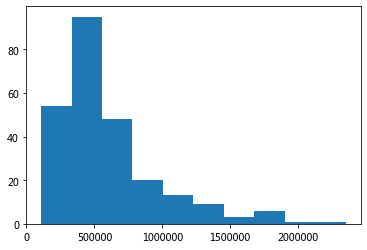

In [19]:
import matplotlib.pyplot as plt

plt.hist(df.rating_num)
plt.show()

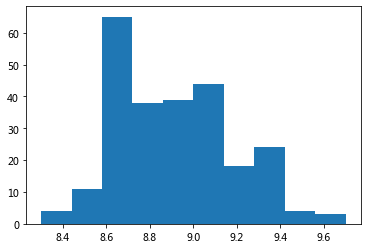

In [20]:
plt.hist(df.rating)
plt.show()

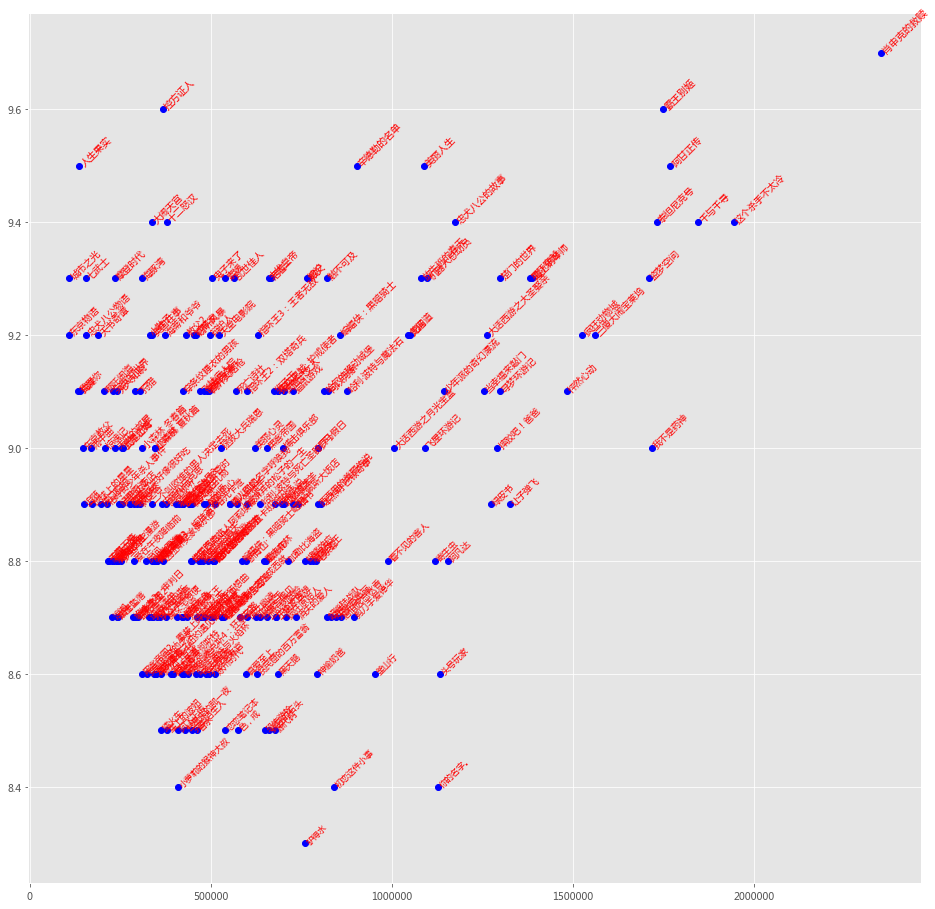

In [21]:
# viz
plt.style.use('ggplot')
fig = plt.figure(figsize=(16, 16),facecolor='white')
plt.plot(df.rating_num, df.rating, 'bo')
for i in df.index:
    plt.text(df.rating_num[i], df.rating[i], df.title[i], 
             fontsize = df.rating[i], 
             color = 'red', rotation = 45)
plt.show() 

In [123]:
df[df.rating > 9.4]

,url,title,rating,rating_num
0,https://movie.douban.com/subject/1292052/,肖申克的救赎,9.6,1004428
1,https://movie.douban.com/subject/1291546/,霸王别姬,9.5,730274
4,https://movie.douban.com/subject/1292063/,美丽人生,9.5,469332
41,https://movie.douban.com/subject/1296141/,控方证人,9.6,108598


In [69]:
alist = []
for i in df.index:
    alist.append( [df.rating_num[i], df.rating[i], df.title[i] ])

blist =[[df.rating_num[i], df.rating[i], df.title[i] ] for i in df.index] 

alist

[[1021383, 9.5999999999999996, '肖申克的救赎'],
 [742984, 9.5, '霸王别姬'],
 [957578, 9.4000000000000004, '这个杀手不太冷'],
 [814634, 9.4000000000000004, '阿甘正传'],
 [475813, 9.5, '美丽人生'],
 [762619, 9.3000000000000007, '千与千寻'],
 [754309, 9.3000000000000007, '泰坦尼克号'],
 [433191, 9.4000000000000004, '辛德勒的名单'],
 [853620, 9.3000000000000007, '盗梦空间'],
 [559729, 9.3000000000000007, '机器人总动员'],
 [657670, 9.1999999999999993, '海上钢琴师'],
 [767473, 9.1999999999999993, '三傻大闹宝莱坞'],
 [529473, 9.1999999999999993, '忠犬八公的故事'],
 [513071, 9.1999999999999993, '放牛班的春天'],
 [561091, 9.1999999999999993, '大话西游之大圣娶亲'],
 [533017, 9.0999999999999996, '楚门的世界'],
 [473631, 9.0999999999999996, '龙猫'],
 [385130, 9.1999999999999993, '教父'],
 [309138, 9.1999999999999993, '熔炉'],
 [560855, 9.1999999999999993, '星际穿越'],
 [299301, 9.1999999999999993, '乱世佳人'],
 [416073, 9.0999999999999996, '触不可及'],
 [458107, 9.0, '无间道'],
 [606767, 8.9000000000000004, '当幸福来敲门'],
 [337952, 9.0999999999999996, '天堂电影院'],
 [633995, 8.9000000000000004, '怦然心动'],
 [190977,

In [8]:
# from IPython.display import display_html, HTML
# HTML('<iframe src=http://nbviewer.jupyter.org/github/computational-class/bigdata/blob/gh-pages/vis/douban250bubble.html \
#      width=1000 height=500></iframe>')

## 作业：

- 抓取复旦新媒体微信公众号最新一期的内容


## requests.post模拟登录豆瓣（包括获取验证码）
https://blog.csdn.net/zhuzuwei/article/details/80875538